In [22]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [23]:
data = pd.read_csv("./bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [24]:
y = data['y']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [37]:
x = data.drop(['y','job','marital','education','default','contact','month','poutcome','housing','loan'],axis = 1)
x.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [39]:
scaler = StandardScaler()
scale = scaler.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)


model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [41]:
score = accuracy_score(y_test,y_pred)
score

0.8917127071823204

In [52]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[790,  17],
       [ 81,  17]], dtype=int64)

In [53]:
report = classification_report(y_test,y_pred)
print("classification report: \n",report)

classification report: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94       807
         yes       0.50      0.17      0.26        98

    accuracy                           0.89       905
   macro avg       0.70      0.58      0.60       905
weighted avg       0.86      0.89      0.87       905



<Axes: >

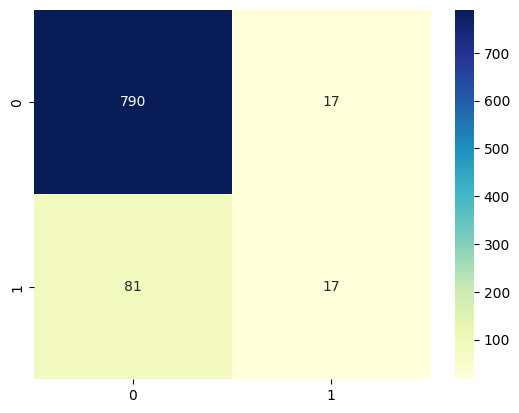

In [54]:
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')